In [1]:
%load_ext autoreload
%autoreload 2

import json, os

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.ticker as mtick
import matplotlib as mpl
from matplotlib.patches import FancyArrowPatch

from Experiment import Experiment
from figure_functions import compute_rolling_average, prediction_compare_plot, latent_space_plot, loss_boxplot
from figure_functions import training_loss_epochs_plot, waterfall_plot, generate_GL_plot, generate_G_plot, summary_boxplot

from figure_functions import get_plot_options
full_params, half_params = get_plot_options()

In [2]:
# Load up the different experiments for analysis
s0 = Experiment(experiment_name="Sys0-Paper-Experiment", data_file_prefix='S0-Oscillator')
s1 = Experiment(experiment_name="Sys1-Paper-Experiment", data_file_prefix='S1-NLSL1')
s2 = Experiment(experiment_name="Sys2-Paper-Experiment", data_file_prefix='S2-NLSL2')

In [3]:
# Use preconfigured full_params plotting options dictionary as starting point
plot_params = full_params.copy()

# Customize:
plot_params['lines.linewidth'] = 1.5
plot_params['axes.linewidth'] = 0.6
plot_params['figure.figsize'] = (5.5,2)
plot_params['legend.fontsize'] = 9

# Reset plot settings, and set new settings:
plt.rcdefaults()
plt.rcParams.update(plot_params)

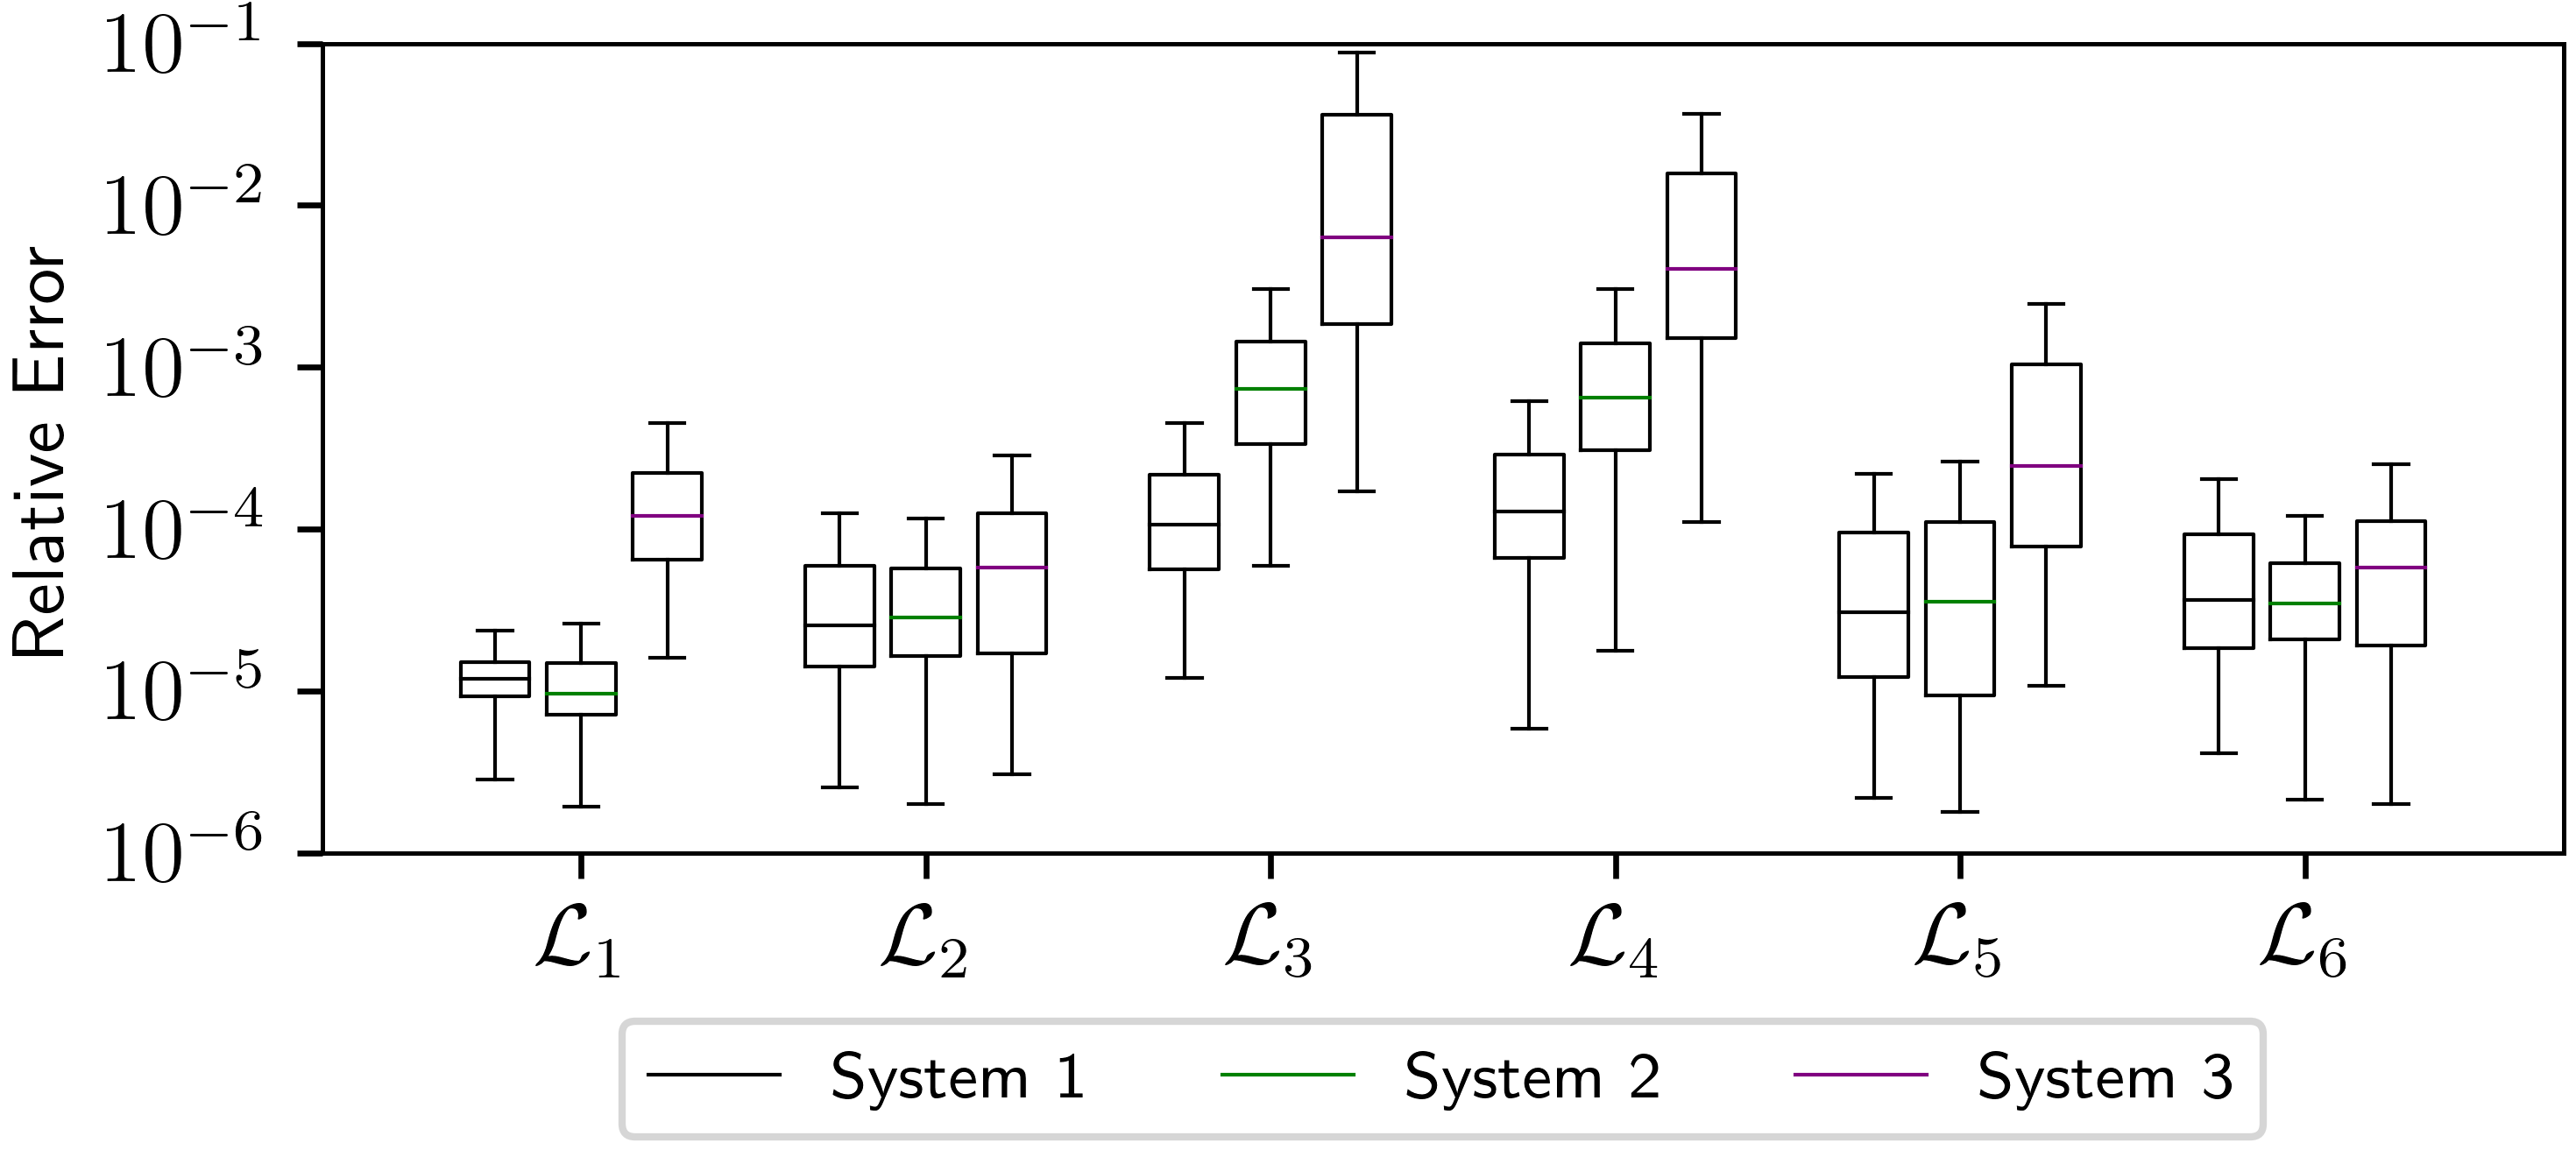

In [4]:
# Make and save the boxplot:
summary_boxplot(s0, s1, s2)
plt.savefig("./figures/Table1-boxplot.svg")
plt.show()

In [5]:
# Use preconfigured full_params plotting options dictionary as starting point
plot_params = half_params.copy()

# Customize:
plot_params['figure.figsize'] = (2.2,2.2)

# Reset plot settings, and set new settings:
plt.rcdefaults()
plt.rcParams.update(plot_params)

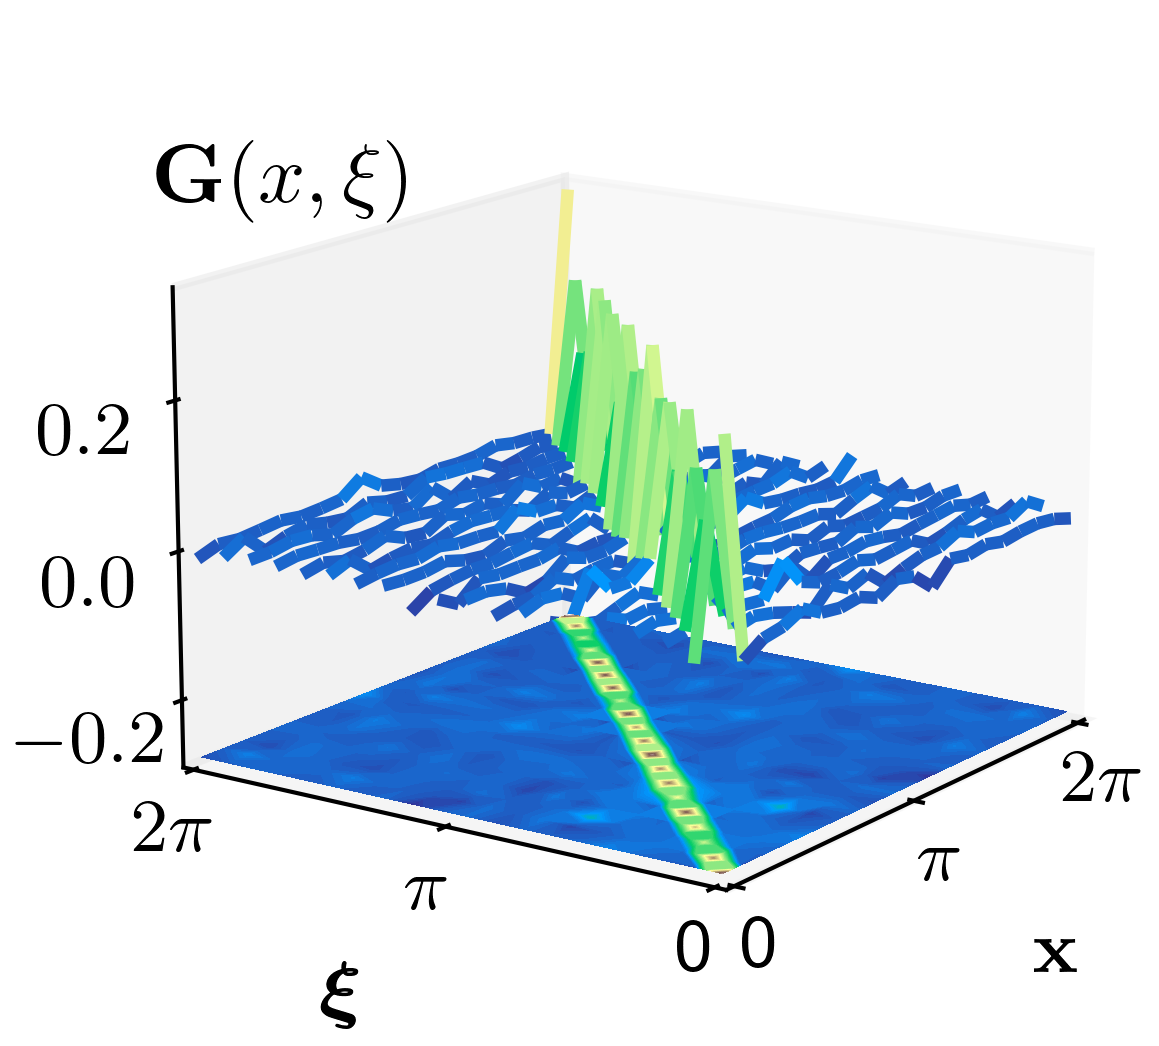

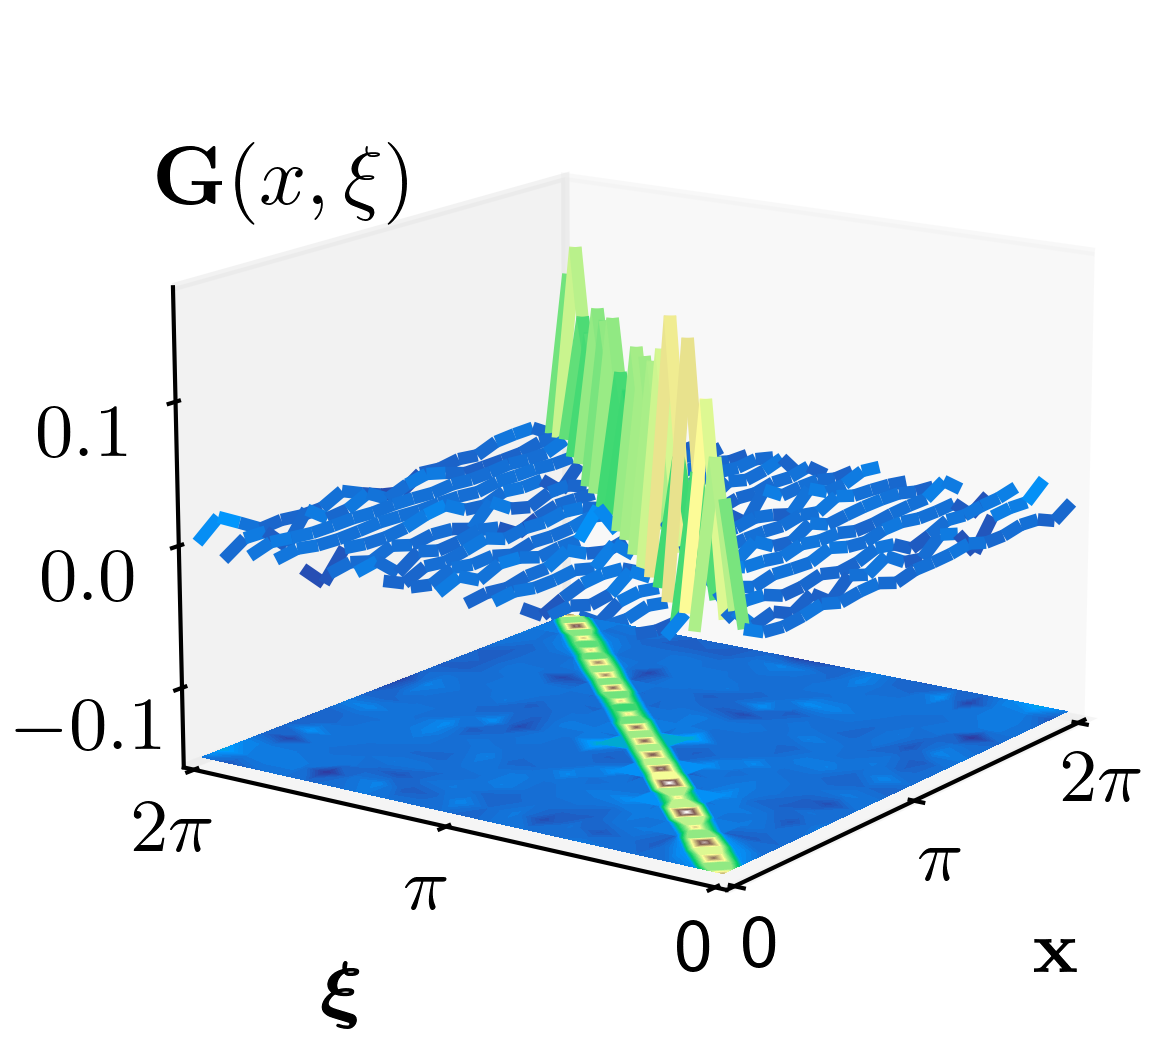

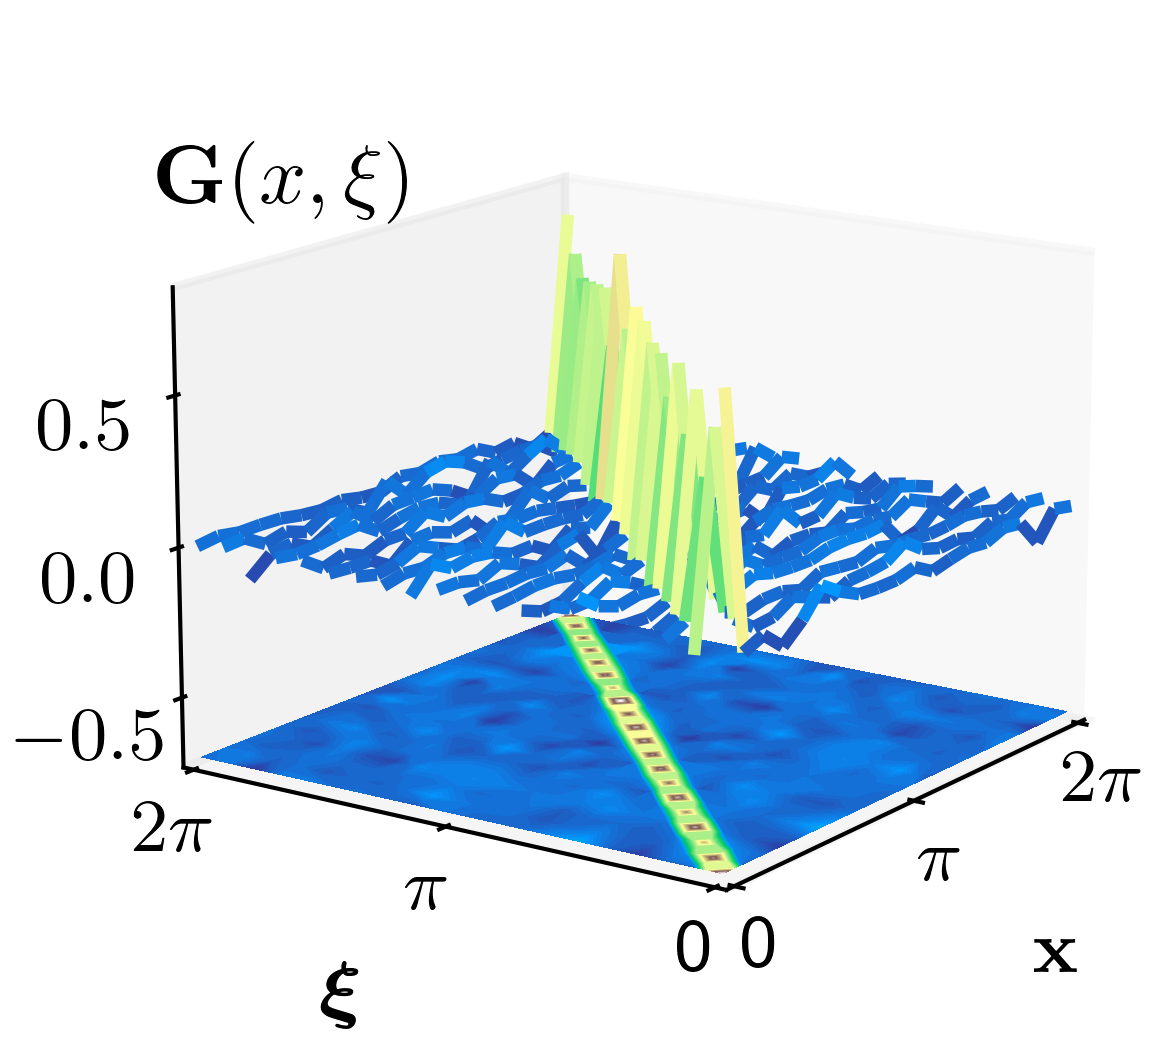

In [6]:
figs = []
for expt in [s0, s1, s2]:
    fig = generate_G_plot(expt)
    figs.append(fig)
    

for fig, expt, fn in zip(figs, [s0, s1, s2], ['S0','S1','S2']):
    plt.figure(fig.number)
    plt.savefig("./figures/Table1-G-{}.png".format(fn))

plt.show()